In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("cleaned.csv")
df

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
0,7,131,4,36692,Female,Home Audio,Philips,2000,6,5,6360,31800
1,19,231,5,36891,Female,Camera,Canon,2000,12,10,9955,99550
2,14,233,5,36893,Female,Camera,Kodak,2001,1,9,7639,68751
3,14,257,5,36926,Female,Camera,Kodak,2001,2,7,5097,35679
4,14,269,5,36952,Female,Camera,Kodak,2001,3,10,6472,64720
...,...,...,...,...,...,...,...,...,...,...,...,...
45161,7828,1157458,5,43341,Female,Headphones,Bose,2018,8,7,5925,41475
45162,8624,1157504,5,43342,Female,Headphones,Pyle,2018,8,7,9717,68019
45163,9513,1157527,5,43344,Male,Headphones,Mpow,2018,9,8,9197,73576
45164,9125,1157555,3,43348,Female,Headphones,EldHus,2018,9,10,8848,88480


In [40]:
df.head()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
0,7,131,4,36692,Female,Home Audio,Philips,2000,6,5,6360,31800
1,19,231,5,36891,Female,Camera,Canon,2000,12,10,9955,99550
2,14,233,5,36893,Female,Camera,Kodak,2001,1,9,7639,68751
3,14,257,5,36926,Female,Camera,Kodak,2001,2,7,5097,35679
4,14,269,5,36952,Female,Camera,Kodak,2001,3,10,6472,64720


In [41]:
df.tail()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
45161,7828,1157458,5,43341,Female,Headphones,Bose,2018,8,7,5925,41475
45162,8624,1157504,5,43342,Female,Headphones,Pyle,2018,8,7,9717,68019
45163,9513,1157527,5,43344,Male,Headphones,Mpow,2018,9,8,9197,73576
45164,9125,1157555,3,43348,Female,Headphones,EldHus,2018,9,10,8848,88480
45165,9478,1157632,1,43374,Female,Headphones,Etre Jeune,2018,10,7,7717,54019


In [42]:
df.shape

(45166, 12)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  int64 
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.1+ MB


In [44]:
df.isnull().sum()

item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
brand        0
year         0
month        0
quantity     0
unitprice    0
amount       0
dtype: int64

In [45]:
df["rating"].describe()

count    45166.000000
mean         4.218594
std          1.221118
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [46]:
df["year"].describe()

count    45166.000000
mean      2014.710136
std          2.264562
min       2000.000000
25%       2014.000000
50%       2015.000000
75%       2016.000000
max       2018.000000
Name: year, dtype: float64

In [47]:
df.nunique()

item_id       1892
user_id      40401
rating           5
timestamp     4179
gender           2
category        10
brand           50
year            19
month           12
quantity         6
unitprice     5001
amount       19611
dtype: int64

what was the best year of sales

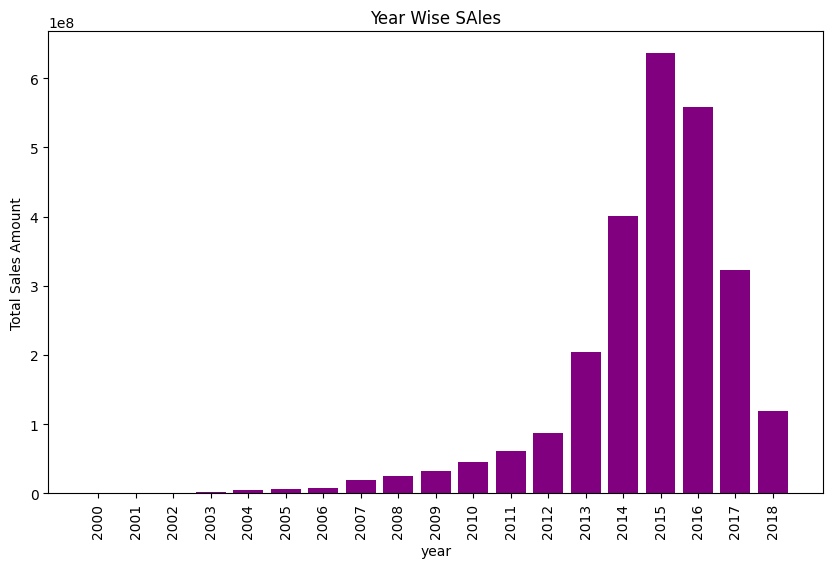

In [48]:
yearly_sales  = df.groupby("year")["amount"].sum().reset_index()
plt.figure(figsize=(10,6))
plt.bar(yearly_sales["year"],yearly_sales["amount"],color="purple")
plt.xlabel("year")
plt.ylabel("Total Sales Amount")
plt.title("Year Wise SAles")
plt.xticks(yearly_sales["year"], rotation = 90)
plt.show()

We can see that the year 2015 to 2018 had the best sales.
what was the best month of sales


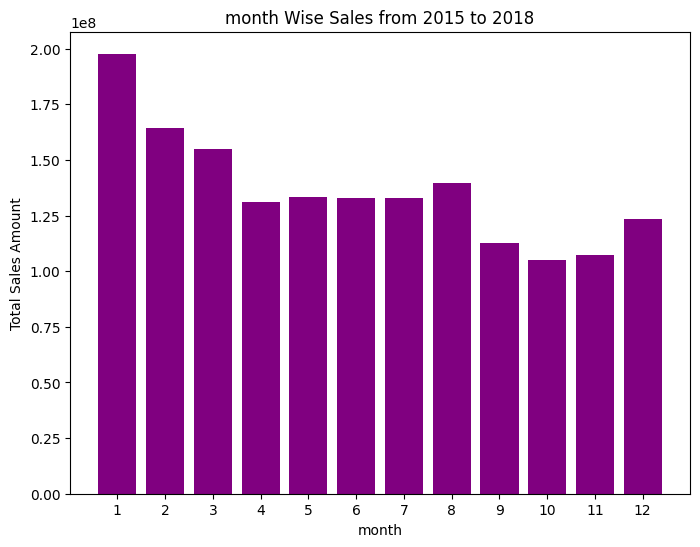

In [49]:
monthly_sales  = df[(df['year'] >= 2015) & (df['year'] <= 2018)].groupby("month")["amount"].sum().reset_index()
plt.figure(figsize=(8,6))
plt.bar(monthly_sales["month"],monthly_sales["amount"],color="purple")
plt.xlabel("month")
plt.ylabel("Total Sales Amount")
plt.title("month Wise Sales from 2015 to 2018")
plt.xticks(monthly_sales["month"])
plt.show()

what brand sold the most in 2015 to 2018

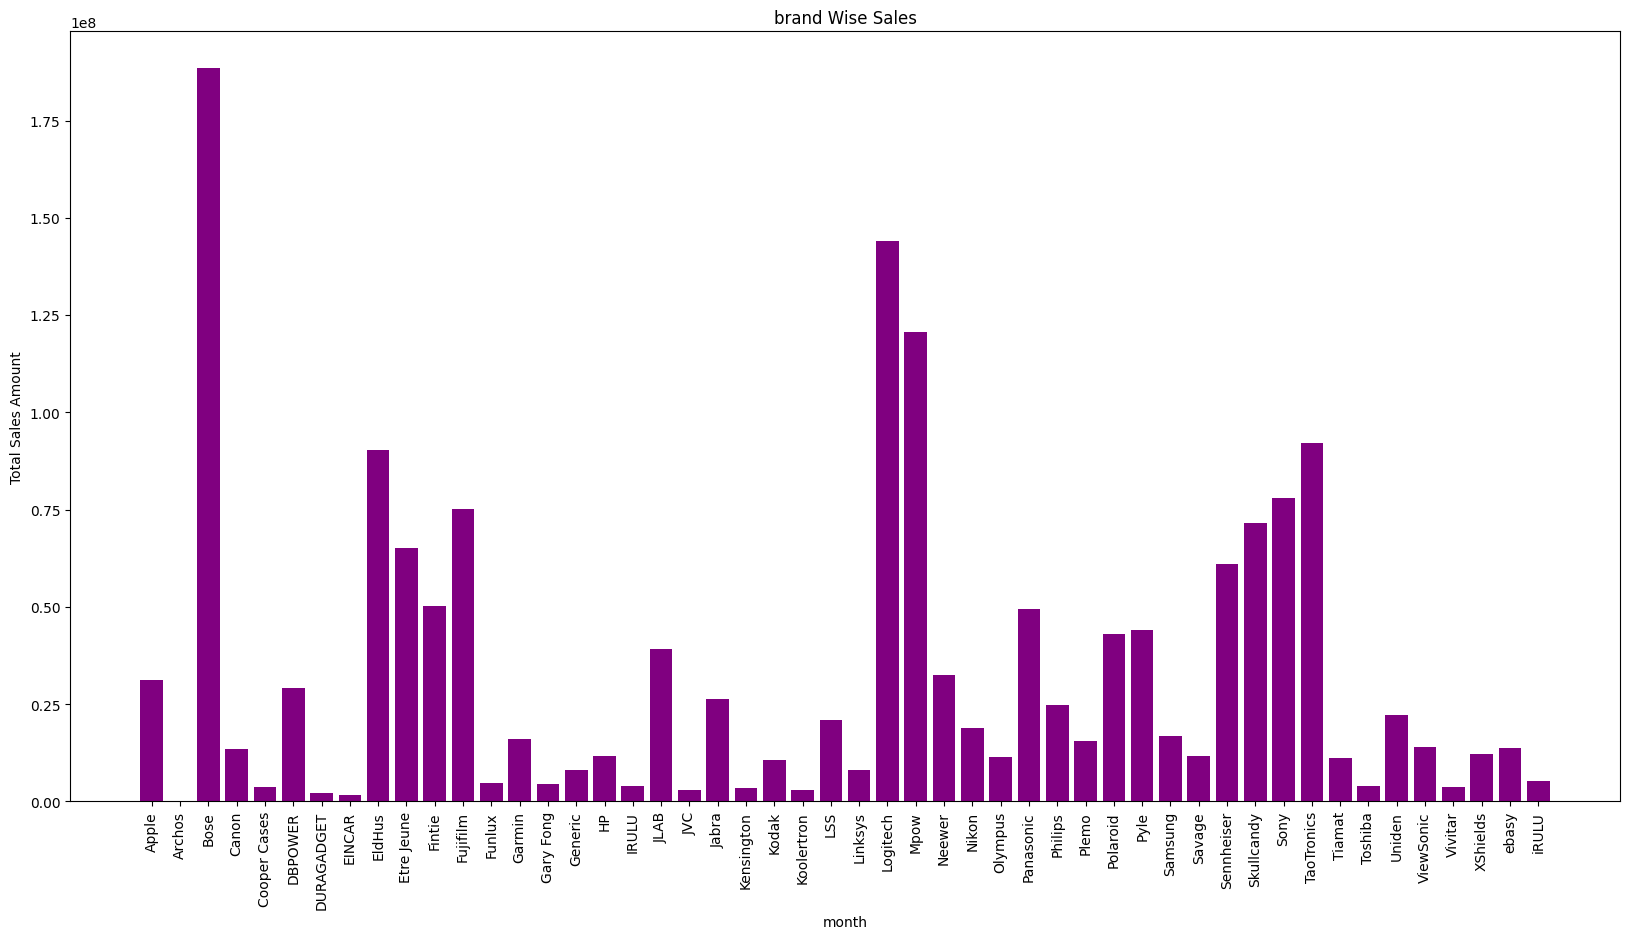

In [50]:
brand_wise = df[(df['year'] >= 2015) & (df['year'] <= 2018)].groupby("brand")["amount"].sum().reset_index()
plt.figure(figsize=(20,10))
plt.bar(brand_wise["brand"],brand_wise["amount"],color="purple")
plt.xlabel("month")
plt.ylabel("Total Sales Amount")
plt.title("brand Wise Sales")
plt.xticks(brand_wise["brand"], rotation = 90)
plt.show()

What products sold the most in the three years 2016, 2017 & 2018

Create subplots with 2 rows and 2 columns

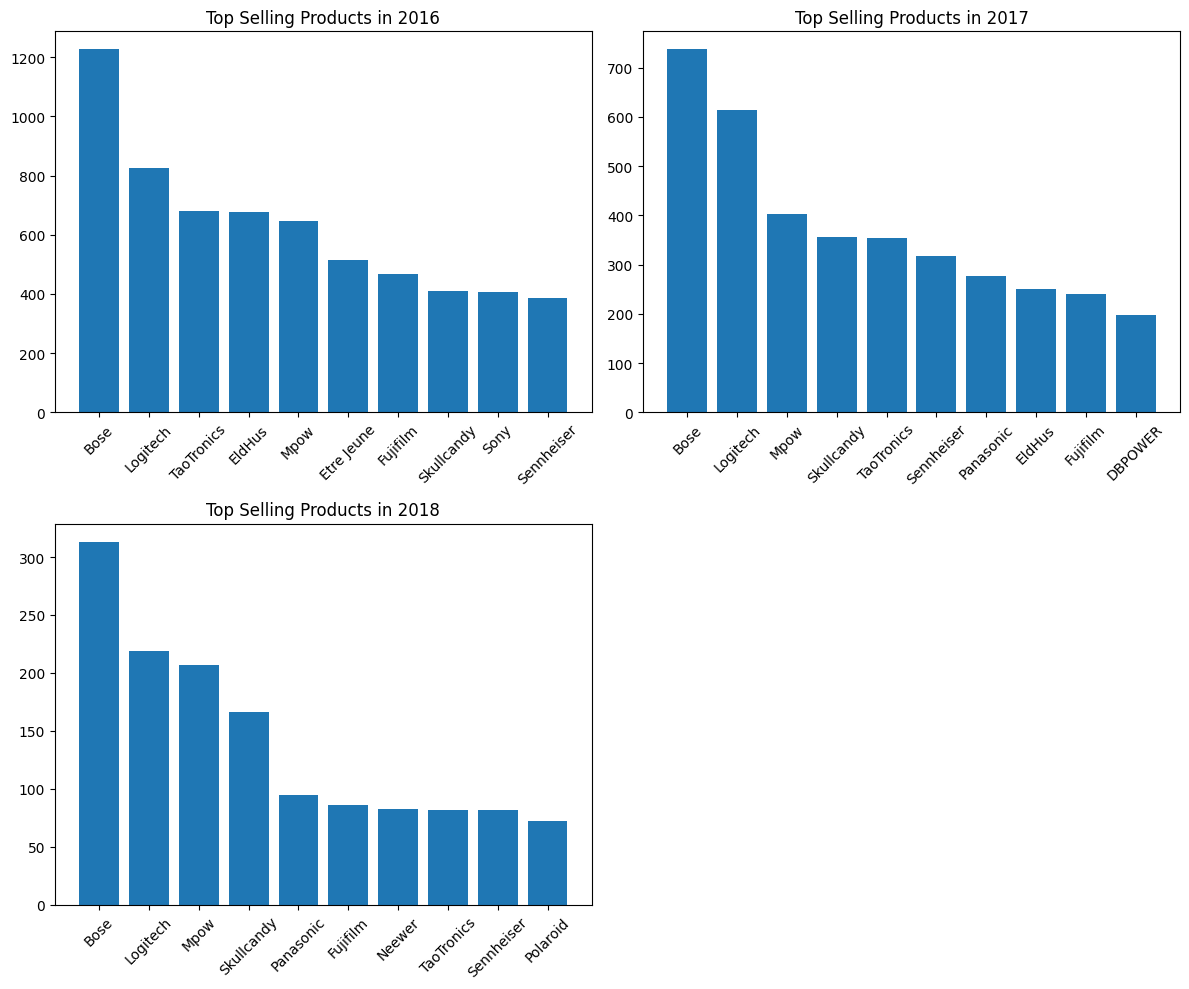

In [51]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Plot for 2016
top_selling_2016 = df[df['year'] == 2016].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[0, 0].bar(top_selling_2016.index, top_selling_2016)
axs[0, 0].set_title('Top Selling Products in 2016')
axs[0, 0].tick_params(axis='x', rotation=45) # Rotate x-axis labels
# Plot for 2017
top_selling_2017 = df[df['year'] == 2017].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[0, 1].bar(top_selling_2017.index, top_selling_2017)
axs[0, 1].set_title('Top Selling Products in 2017')
axs[0, 1].tick_params(axis='x', rotation=45) # Rotate x-axis labels
# Plot for 2018
top_selling_2018 = df[df['year'] == 2018].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[1, 0].bar(top_selling_2018.index, top_selling_2018)
axs[1, 0].set_title('Top Selling Products in 2018')
axs[1, 0].tick_params(axis='x', rotation=45) # Rotate x-axis labels
# Hide the empty subplot
axs[1, 1].axis('off')
# Adjust layout for better appearance
plt.tight_layout()
# Show the plots
plt.show()

What product by category sold the most between 2015 to 2018?

<Axes: title={'center': 'Top 10 Most Sold Product Category 2015 to 2018'}, xlabel='category'>

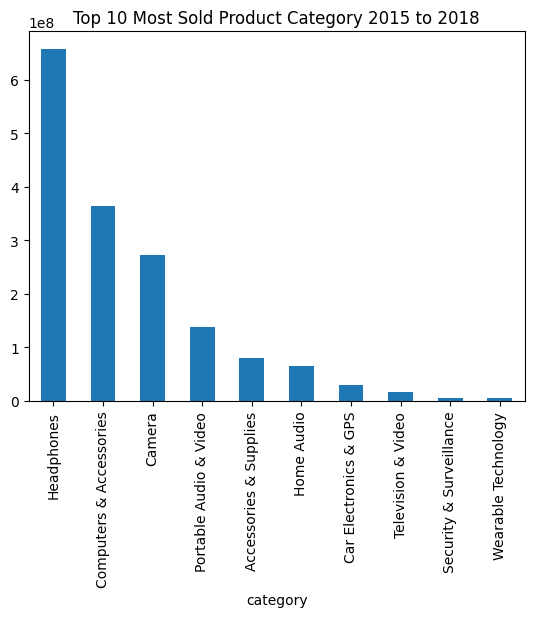

In [52]:
dataset2015_2018 = df[(df['year'] >= 2015) & (df['year'] <= 2018)]
dataset2015_2018.groupby('category')['amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 Most Sold Product Category 2015 to 2018')


What product by category sold the least between 2015 to 2018?

<Axes: title={'center': '10 Least Sold Product Brand 2015 to 2018'}, xlabel='category'>

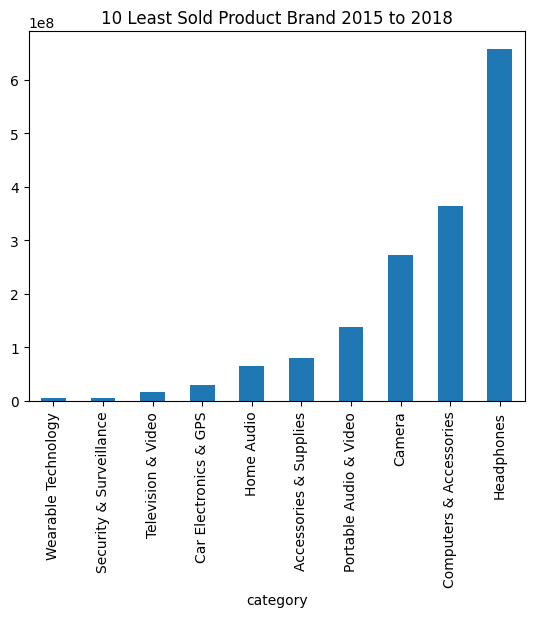

In [53]:
dataset2015_2018 = df[(df['year'] >= 2015) & (df['year'] <= 2018)]
dataset2015_2018.groupby('category')['amount'].sum().sort_values(ascending=True).head(10).plot(kind='bar',title='10 Least Sold Product Brand 2015 to 2018')

What product by brand name sold the least between 2015 to 2018?


<Axes: title={'center': '10 Least Sold Product Brand 2015 to 2018'}, xlabel='brand'>

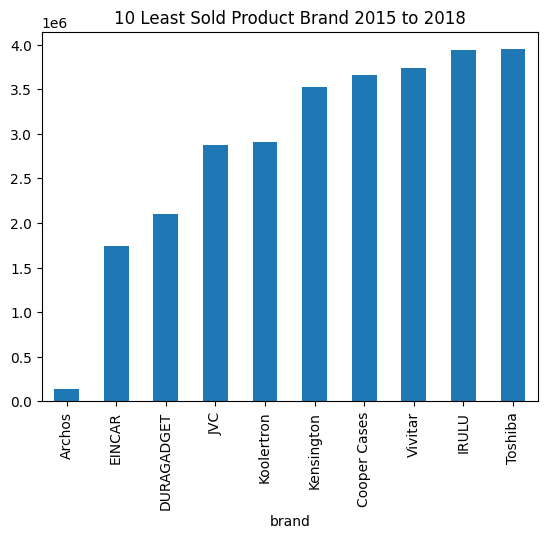

In [54]:
dataset2015_2018 = df[(df['year'] >= 2015) & (df['year'] <= 2018)]
dataset2015_2018.groupby('brand')['amount'].sum().sort_values(ascending=True).head(10).plot(kind='bar',title='10 Least Sold Product Brand 2015 to 2018')

Ratings Distribution


<Axes: xlabel='rating', ylabel='count'>

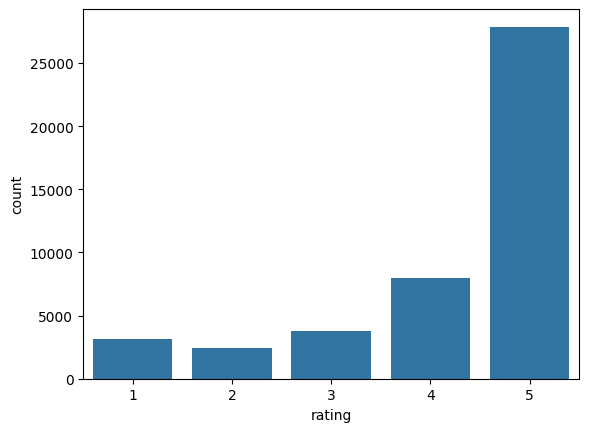

In [55]:
sns.countplot(x='rating', data=df)

What is the most rated brand name between 2015 to 2018?


<Axes: title={'center': '10 most rating Brand 2015 to 2018'}, xlabel='brand'>

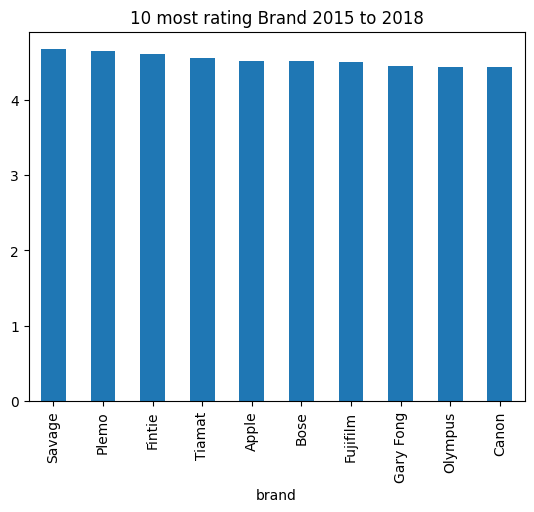

In [56]:
dataset2015_2018 = df[(df['year'] >= 2015) & (df['year'] <= 2018)]
dataset2015_2018.groupby('brand')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar',title='10 most rating Brand 2015 to 2018')


Top 5 category sales percentage

<Axes: title={'center': 'Top 5 category sales percentage'}, ylabel='amount'>

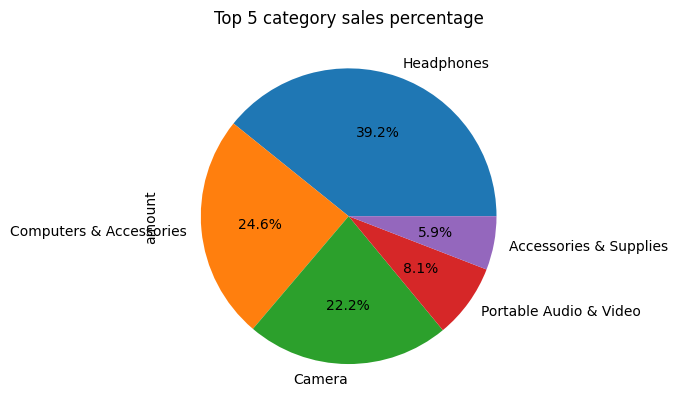

In [57]:
df.groupby('category')['amount'].sum().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%',title='Top 5 category sales percentage')

brand wise sales percentage

<Axes: title={'center': 'Top 5 Brand wise sales percentage'}, ylabel='rating'>

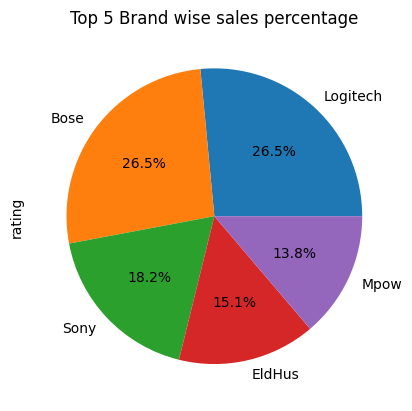

In [58]:
df.groupby('brand')['rating'].count().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%',title='Top 5 Brand wise sales percentage')


Gender wise customer distribution


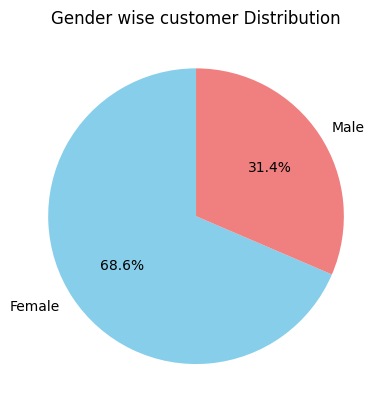

In [59]:
gender_distribution = df['gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index,
autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender wise customer Distribution')
plt.show()
